In [19]:
import torch
import matplotlib.pyplot as plt
import numpy as np

from loader import get_dataloader
from train import run
from models import PointNet, PointCNN, Defense_PointNet
from attack import attacktest

In [20]:
b_size=16
num_class = 10 #
name = '{}'.format(num_class)
device = torch.device("cuda:0" if torch.cuda.is_available() else 'cpu')
_, test_loader = get_dataloader(1024, b_size, name)

In [3]:
print ('Available devices ', torch.cuda.device_count())
print ('Current cuda device ', torch.cuda.current_device())
print(torch.cuda.get_device_name(device))

Available devices  1
Current cuda device  0
GeForce RTX 2080 Ti


Attack

In [4]:
#load pretrained
PN = PointNet(num_class)
PN.load_state_dict(torch.load('saves/PointNet.pth'))
PN.eval()

PCNN = PointCNN(num_class)
PCNN.load_state_dict(torch.load('saves/PointCNN.pth'))
PCNN.eval()

PointCNN(
  (conv1): XConv(0, 48)
  (conv2): XConv(48, 96)
  (conv3): XConv(96, 192)
  (conv4): XConv(192, 384)
  (lin1): Linear(in_features=384, out_features=256, bias=True)
  (lin2): Linear(in_features=256, out_features=128, bias=True)
  (lin3): Linear(in_features=128, out_features=10, bias=True)
)

In [5]:
DPN = Defense_PointNet(num_class)
DPN.load_state_dict(torch.load('saves/Defense_PointNet.pth'))
DPN.eval()

Defense_PointNet(
  (conv1): PointConv(local_nn=Sequential(
    (0): Linear(in_features=3, out_features=64, bias=True)
    (1): ReLU()
    (2): Linear(in_features=64, out_features=64, bias=True)
  ), global_nn=None)
  (conv2): PointConv(local_nn=Sequential(
    (0): Linear(in_features=67, out_features=128, bias=True)
    (1): ReLU()
    (2): Linear(in_features=128, out_features=128, bias=True)
  ), global_nn=None)
  (conv3): PointConv(local_nn=Sequential(
    (0): Linear(in_features=131, out_features=256, bias=True)
    (1): ReLU()
    (2): Linear(in_features=256, out_features=256, bias=True)
  ), global_nn=None)
  (lin1): Linear(in_features=256, out_features=256, bias=True)
  (lin2): Linear(in_features=256, out_features=256, bias=True)
  (lin3): Linear(in_features=256, out_features=10, bias=True)
  (D_lin1): Linear(in_features=256, out_features=256, bias=True)
  (D_lin2): Linear(in_features=256, out_features=2, bias=True)
)

In [6]:
#test the loaded model
from train import test, test_defense

PN = PN.to(device)
PCNN = PCNN.to(device)
test_acc = test(PN, test_loader, device)
print ("PointNet test acc: {:.04f}".format(test_acc))
test_acc = test(PCNN, test_loader, device)
print ("PointCNN acc: {:.04f}".format(test_acc))

PointNet test acc: 0.9262
PointCNN acc: 0.9328


1) PointNet -> PointNet

Epsilon: 0	Test Accuracy = 836 / 908 = 0.920704845814978
Epsilon: 0.05	Test Accuracy = 779 / 908 = 0.8579295154185022
Epsilon: 0.1	Test Accuracy = 661 / 908 = 0.7279735682819384
Epsilon: 0.15	Test Accuracy = 519 / 908 = 0.5715859030837004
Epsilon: 0.2	Test Accuracy = 532 / 908 = 0.5859030837004405
Epsilon: 0.25	Test Accuracy = 447 / 908 = 0.4922907488986784
Epsilon: 0.3	Test Accuracy = 348 / 908 = 0.3832599118942731


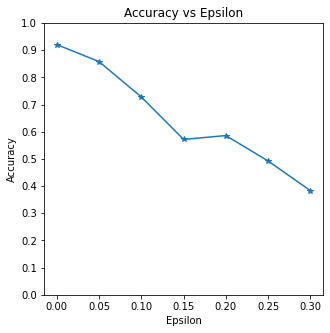

In [8]:
accuracies = []
examples = []
epsilons = [0, .05, .1, .15, .2, .25, .3]

# Run test for each epsilon
for eps in epsilons:
    acc, ex = attacktest(PN, PN, device, test_loader, eps)
    accuracies.append(acc)
    examples.append(ex)
    
plt.figure(figsize=(5,5))
plt.plot(epsilons, accuracies, "*-")
plt.yticks(np.arange(0, 1.1, step=0.1))
plt.xticks(np.arange(0, .35, step=0.05))
plt.title("Accuracy vs Epsilon")
plt.xlabel("Epsilon")
plt.ylabel("Accuracy")
plt.show()

2) PointNet -> PointCNN

Epsilon: 0	Test Accuracy = 844 / 908 = 0.9295154185022027
Epsilon: 0.05	Test Accuracy = 810 / 908 = 0.8920704845814978
Epsilon: 0.1	Test Accuracy = 745 / 908 = 0.8204845814977973
Epsilon: 0.15	Test Accuracy = 636 / 908 = 0.7004405286343612
Epsilon: 0.2	Test Accuracy = 554 / 908 = 0.6101321585903083
Epsilon: 0.25	Test Accuracy = 440 / 908 = 0.4845814977973568
Epsilon: 0.3	Test Accuracy = 364 / 908 = 0.4008810572687225


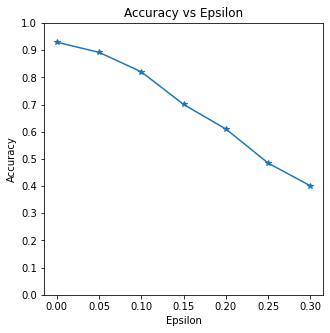

In [6]:
accuracies = []
examples = []
epsilons = [0, .05, .1, .15, .2, .25, .3]

# Run test for each epsilon
for eps in epsilons:
    acc, ex = attacktest(PN, PCNN, device, test_loader, eps)
    accuracies.append(acc)
    examples.append(ex)
    
plt.figure(figsize=(5,5))
plt.plot(epsilons, accuracies, "*-")
plt.yticks(np.arange(0, 1.1, step=0.1))
plt.xticks(np.arange(0, .35, step=0.05))
plt.title("Accuracy vs Epsilon")
plt.xlabel("Epsilon")
plt.ylabel("Accuracy")
plt.show()

3) PointCNN -> PointCNN

In [ ]:
accuracies = []
examples = []
epsilons = [0, .05, .1, .15, .2, .25, .3]

# Run test for each epsilon
for eps in epsilons:
    acc, ex = attacktest(PCNN, PCNN, device, test_loader, eps)
    accuracies.append(acc)
    examples.append(ex)
    
plt.figure(figsize=(5,5))
plt.plot(epsilons, accuracies, "*-")
plt.yticks(np.arange(0, 1.1, step=0.1))
plt.xticks(np.arange(0, .35, step=0.05))
plt.title("Accuracy vs Epsilon")
plt.xlabel("Epsilon")
plt.ylabel("Accuracy")
plt.show()

Epsilon: 0	Test Accuracy = 849 / 908 = 0.9350220264317181


4) PointCNN -> PointNet

In [ ]:
accuracies = []
examples = []
epsilons = [0, .05, .1, .15, .2, .25, .3]


# Run test for each epsilon
for eps in epsilons:
    acc, ex = attacktest(PCNN, PN, device, test_loader, eps)
    accuracies.append(acc)
    examples.append(ex)
    
plt.figure(figsize=(5,5))
plt.plot(epsilons, accuracies, "*-")
plt.yticks(np.arange(0, 1.1, step=0.1))
plt.xticks(np.arange(0, .35, step=0.05))
plt.title("Accuracy vs Epsilon")
plt.xlabel("Epsilon")
plt.ylabel("Accuracy")
plt.show()

5) PointNet -> Defense PN

Epsilon: 0	Test Accuracy = 846 / 908 = 0.9317180616740088
Epsilon: 0.05	Test Accuracy = 798 / 908 = 0.8788546255506607
Epsilon: 0.1	Test Accuracy = 589 / 908 = 0.6486784140969163
Epsilon: 0.15	Test Accuracy = 446 / 908 = 0.4911894273127753
Epsilon: 0.2	Test Accuracy = 397 / 908 = 0.43722466960352424
Epsilon: 0.25	Test Accuracy = 305 / 908 = 0.33590308370044053
Epsilon: 0.3	Test Accuracy = 256 / 908 = 0.28193832599118945


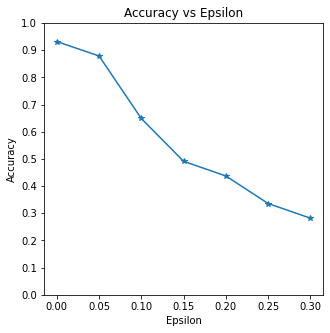

In [6]:
accuracies = []
examples = []
epsilons = [0, .05, .1, .15, .2, .25, .3]


# Run test for each epsilon
for eps in epsilons:
    acc, ex = attacktest(PN, DPN, device, test_loader, eps)
    accuracies.append(acc)
    examples.append(ex)
    
plt.figure(figsize=(5,5))
plt.plot(epsilons, accuracies, "*-")
plt.yticks(np.arange(0, 1.1, step=0.1))
plt.xticks(np.arange(0, .35, step=0.05))
plt.title("Accuracy vs Epsilon")
plt.xlabel("Epsilon")
plt.ylabel("Accuracy")
plt.show()

6)Defense PN -> Defense PN (from classification backward)

Epsilon: 0	Test Accuracy = 841 / 908 = 0.9262114537444934
Epsilon: 0.05	Test Accuracy = 753 / 908 = 0.829295154185022
Epsilon: 0.1	Test Accuracy = 629 / 908 = 0.6927312775330396
Epsilon: 0.15	Test Accuracy = 464 / 908 = 0.5110132158590308
Epsilon: 0.2	Test Accuracy = 472 / 908 = 0.5198237885462555
Epsilon: 0.25	Test Accuracy = 382 / 908 = 0.42070484581497797
Epsilon: 0.3	Test Accuracy = 300 / 908 = 0.3303964757709251


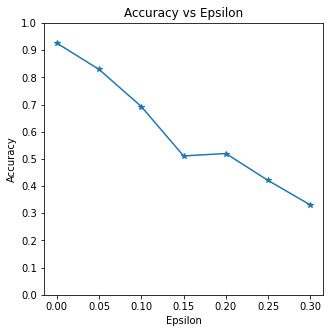

In [7]:
accuracies = []
examples = []
epsilons = [0, .05, .1, .15, .2, .25, .3]


# Run test for each epsilon
for eps in epsilons:
    acc, ex = attacktest(DPN, DPN, device, test_loader, eps)
    accuracies.append(acc)
    examples.append(ex)
    
plt.figure(figsize=(5,5))
plt.plot(epsilons, accuracies, "*-")
plt.yticks(np.arange(0, 1.1, step=0.1))
plt.xticks(np.arange(0, .35, step=0.05))
plt.title("Accuracy vs Epsilon")
plt.xlabel("Epsilon")
plt.ylabel("Accuracy")
plt.show()

In [22]:
import torch
import torch.nn.functional as F

from torch_geometric.nn import PointConv, radius_graph, fps, global_max_pool, XConv, fps, global_mean_pool
from torch_geometric.transforms import RadiusGraph
from torch.nn import Sequential as Seq, Linear as Lin, ReLU
    



In [23]:
DPN = Defense_PointNet(10)

In [24]:
for i in test_loader:
    a,b = DPN(i.pos, i.batch)
    break

In [68]:
a

In [69]:
l= F.nll_loss(a, i.y)
l.backward()

RuntimeError: Trying to backward through the graph a second time, but the buffers have already been freed. Specify retain_graph=True when calling backward the first time.

In [79]:
DPN.D_lin1.requires_grad=False